# Scipy

## Cubic spline interpolation to create a smooth surface from complex 3D data points:

/var/folders/1y/b_fbg_px6rz7r15bg95r0wfc0000gn/T/ipykernel_24077/2116478282.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


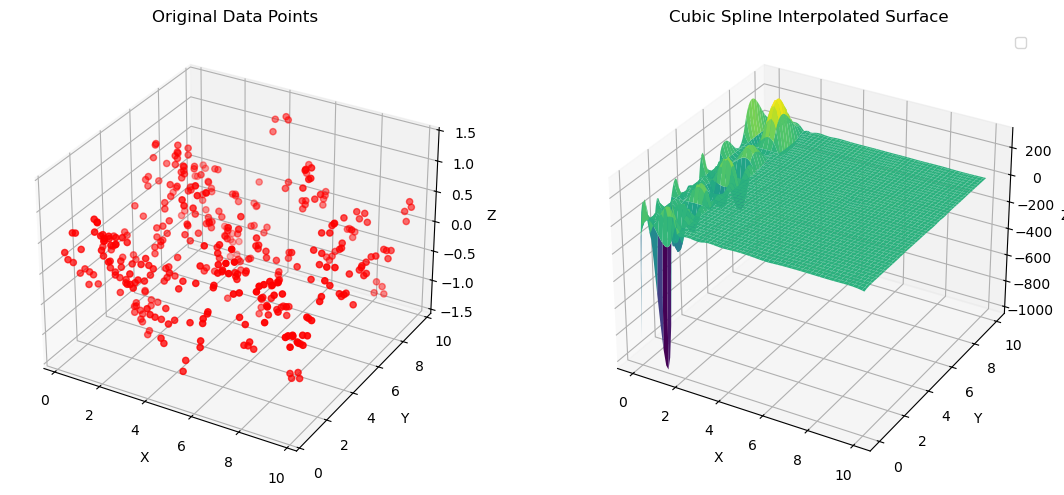

Sample original points (first 5):
x: 0.21, y: 0.46, z: 0.30
x: 0.58, y: 0.65, z: 0.15
x: 1.56, y: 0.98, z: 0.04
x: 1.56, y: 1.39, z: -0.22
x: 1.82, y: 1.71, z: -0.21

Sample interpolated points (first 5):
x: 0.00, y: 0.00, z: -861.26
x: 0.10, y: 0.10, z: -408.80
x: 0.20, y: 0.20, z: -112.01
x: 0.30, y: 0.30, z: 55.34
x: 0.40, y: 0.40, z: 119.46


In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample complex data
np.random.seed(42)
n_points = 20

# Create irregular x, y coordinates
x = np.sort(np.random.uniform(0, 10, n_points))
y = np.sort(np.random.uniform(0, 10, n_points))
X, Y = np.meshgrid(x, y)

# Create complex z data (combination of sine waves with noise)
Z = (np.sin(X) * np.cos(Y) +
     0.5 * np.sin(2*X) * np.cos(2*Y) +
     np.random.normal(0, 0.1, X.shape))

# Create finer mesh for smooth interpolation
x_fine = np.linspace(0, 10, 100)
y_fine = np.linspace(0, 10, 100)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

# Perform cubic spline interpolation
# First interpolate along x for each y
cs_x = []
for i in range(n_points):
    cs = CubicSpline(x, Z[i, :])
    cs_x.append(cs(x_fine))

# Then interpolate along y
Z_smooth = np.zeros((100, 100))
for i in range(100):
    cs = CubicSpline(y, [cs_x[j][i] for j in range(n_points)])
    Z_smooth[:, i] = cs(y_fine)

# Create 3D plot
fig = plt.figure(figsize=(12, 5))

# Original data points
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X, Y, Z, c='r', marker='o', label='Original Points')
ax1.set_title('Original Data Points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Smooth surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_fine, Y_fine, Z_smooth, cmap='viridis')
ax2.set_title('Cubic Spline Interpolated Surface')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.legend()
plt.tight_layout()
plt.show()

# Print some sample values for comparison
print("Sample original points (first 5):")
for i in range(min(5, n_points)):
    print(f"x: {x[i]:.2f}, y: {y[i]:.2f}, z: {Z[i, 0]:.2f}")

print("\nSample interpolated points (first 5):")
for i in range(5):
    print(f"x: {x_fine[i]:.2f}, y: {y_fine[i]:.2f}, z: {Z_smooth[i, 0]:.2f}")

## Fourier Transformation using Scipy's FFT

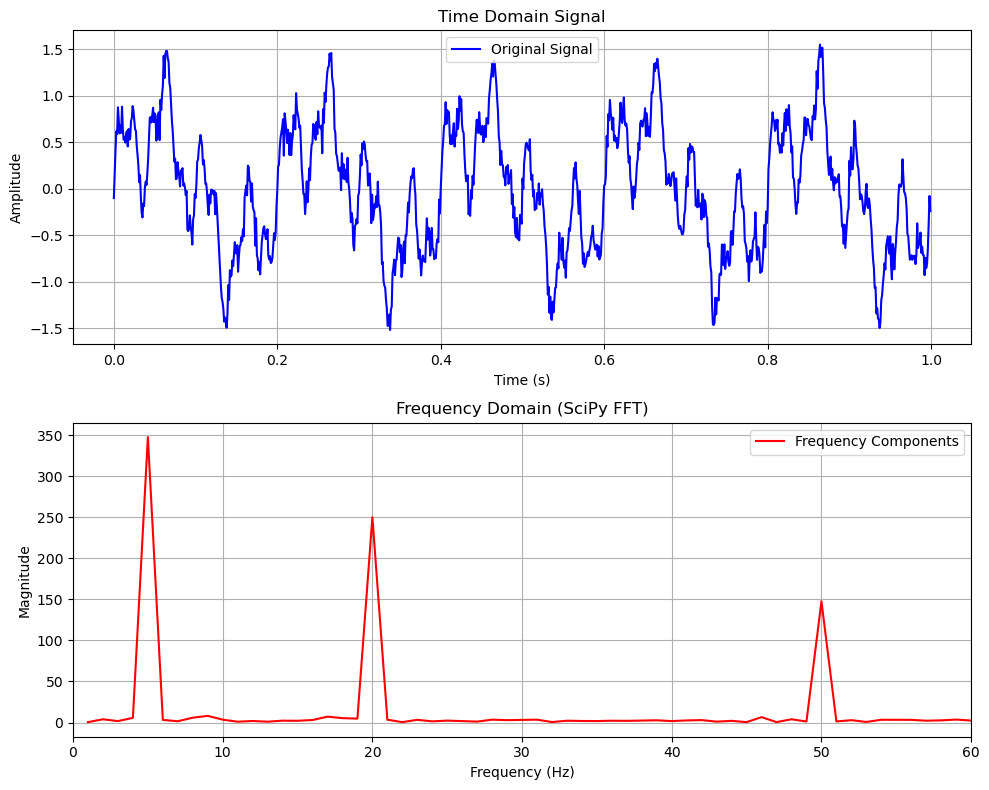

Sampling frequency: 1000.0 Hz
Nyquist frequency: 500.0 Hz

Dominant frequencies and their magnitudes:
Frequency: 50.0 Hz, Magnitude: 147.64
Frequency: 20.0 Hz, Magnitude: 250.03
Frequency: 5.0 Hz, Magnitude: 347.58


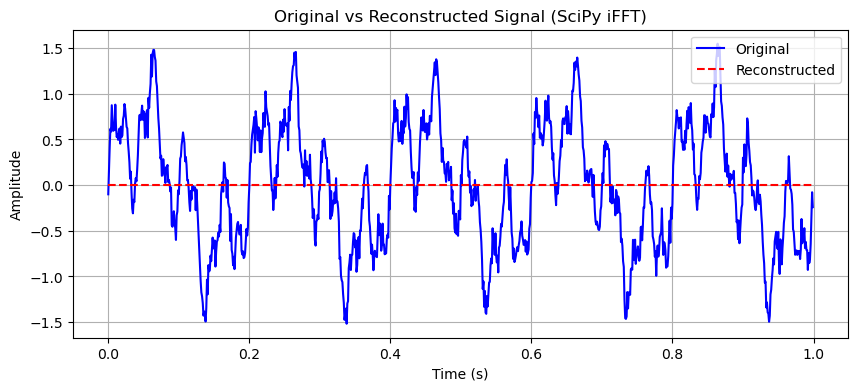

In [4]:
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt

# Generate a sample signal
# Time vector (1 second, 1000 samples)
t = np.linspace(0, 1, 1000, endpoint=False)
freq1, freq2, freq3 = 5, 20, 50  # Frequencies in Hz

# Create signal with multiple frequency components plus noise
signal = (0.7 * np.sin(2 * np.pi * freq1 * t) +
          0.5 * np.sin(2 * np.pi * freq2 * t) +
          0.3 * np.sin(2 * np.pi * freq3 * t) +
          0.1 * np.random.normal(0, 1, t.size))

# Perform Fourier Transform using SciPy
n_samples = len(t)
dt = t[1] - t[0]  # Sampling interval
fourier = fft.fft(signal)
frequencies = fft.fftfreq(n_samples, dt)

# Get positive frequencies only (up to Nyquist frequency)
pos_mask = frequencies > 0
freqs = freqs = frequencies[pos_mask]
magnitude = np.abs(fourier)[pos_mask]

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Time domain plot
ax1.plot(t, signal, 'b-', label='Original Signal')
ax1.set_title('Time Domain Signal')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid(True)
ax1.legend()

# Frequency domain plot
ax2.plot(freqs, magnitude, 'r-', label='Frequency Components')
ax2.set_title('Frequency Domain (SciPy FFT)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_xlim(0, 60)  # Limit to see main frequencies clearly
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Print key information
print("Sampling frequency:", 1/dt, "Hz")
print("Nyquist frequency:", 1/(2*dt), "Hz")
print("\nDominant frequencies and their magnitudes:")
peak_indices = np.argsort(magnitude)[-3:]  # Get top 3 frequencies
for idx in peak_indices:
    print(f"Frequency: {freqs[idx]:.1f} Hz, Magnitude: {magnitude[idx]:.2f}")

# Signal reconstruction using inverse FFT
# Create frequency domain with only main components
fourier_filtered = np.zeros_like(fourier, dtype=complex)
fourier_filtered[pos_mask][peak_indices] = fourier[pos_mask][peak_indices]
# Add negative frequencies using ~ instead of -
fourier_filtered[~pos_mask][peak_indices] = fourier[~pos_mask][peak_indices]
reconstructed = fft.ifft(fourier_filtered).real

# Plot original vs reconstructed
plt.figure(figsize=(10, 4))
plt.plot(t, signal, 'b-', label='Original')
plt.plot(t, reconstructed, 'r--', label='Reconstructed')
plt.title('Original vs Reconstructed Signal (SciPy iFFT)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## Numpy Fourier Transformation

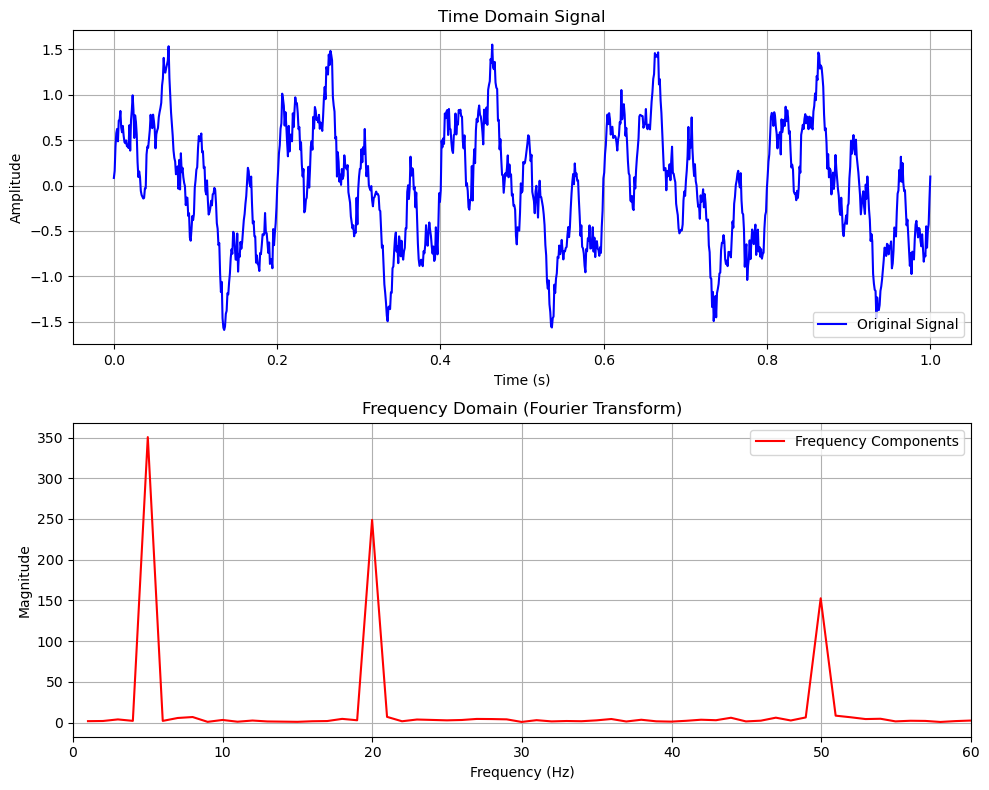

Sampling frequency: 999.0 Hz
Nyquist frequency: 499.5 Hz

Dominant frequencies and their magnitudes:
Frequency: 49.9 Hz, Magnitude: 152.61
Frequency: 20.0 Hz, Magnitude: 248.89
Frequency: 5.0 Hz, Magnitude: 350.55


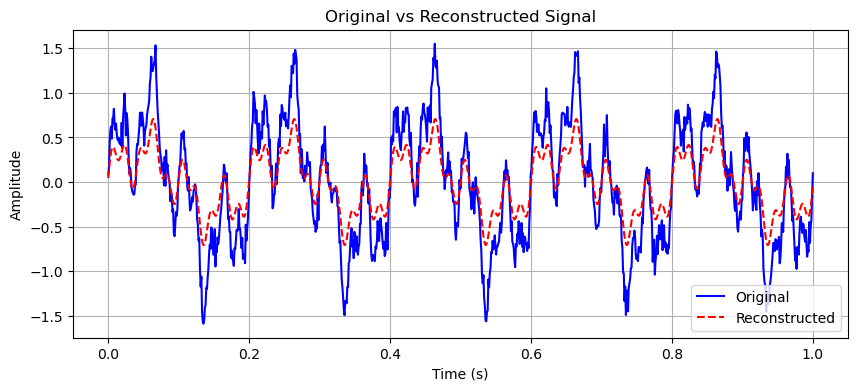

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal (combination of different frequencies)
t = np.linspace(0, 1, 1000)  # Time vector (1 second, 1000 samples)
freq1, freq2, freq3 = 5, 20, 50  # Frequencies in Hz

# Create signal with multiple frequency components plus noise
signal = (0.7 * np.sin(2 * np.pi * freq1 * t) +
          0.5 * np.sin(2 * np.pi * freq2 * t) +
          0.3 * np.sin(2 * np.pi * freq3 * t) +
          0.1 * np.random.normal(0, 1, t.size))

# Perform Fourier Transform
n_samples = len(t)
dt = t[1] - t[0]  # Sampling interval
fourier = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n_samples, dt)

# Get positive frequencies only (up to Nyquist frequency)
pos_mask = frequencies > 0
freqs = frequencies[pos_mask]
magnitude = np.abs(fourier)[pos_mask]

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Time domain plot
ax1.plot(t, signal, 'b-', label='Original Signal')
ax1.set_title('Time Domain Signal')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid(True)
ax1.legend()

# Frequency domain plot
ax2.plot(freqs, magnitude, 'r-', label='Frequency Components')
ax2.set_title('Frequency Domain (Fourier Transform)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_xlim(0, 60)  # Limit to see main frequencies clearly
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Print some key information
print("Sampling frequency:", 1/dt, "Hz")
print("Nyquist frequency:", 1/(2*dt), "Hz")
print("\nDominant frequencies and their magnitudes:")
# Find peaks
peak_indices = np.argsort(magnitude)[-3:]  # Get top 3 frequencies
for idx in peak_indices:
    print(f"Frequency: {freqs[idx]:.1f} Hz, Magnitude: {magnitude[idx]:.2f}")

# Example of reconstructing signal with main components
main_freqs = freqs[peak_indices]
main_mags = fourier[pos_mask][peak_indices]
reconstructed = np.zeros_like(signal)
for freq, mag in zip(main_freqs, main_mags):
    reconstructed += np.real(mag * np.exp(2j * np.pi * freq * t) / n_samples)

# Plot original vs reconstructed
plt.figure(figsize=(10, 4))
plt.plot(t, signal, 'b-', label='Original')
plt.plot(t, reconstructed, 'r--', label='Reconstructed')
plt.title('Original vs Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()